In [7]:
import numpy as np
import pandas as pd

In [9]:
# csv 파일 읽어오기
df = pd.read_csv('C:/Users/신수경/Desktop/수경/멋쟁이사자처럼/데이터톤/merged_data.csv', encoding='utf-8-sig')
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_time_moscow,event_month,user_key
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:00+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:03+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:07+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:07+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:15+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...
20688106,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-03-01 02:59:32+03:00,NaN,622082947fb29909b-6ef5-4662-b4ee-288e73e5dc10
20688107,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-03-01 02:59:39+03:00,NaN,45970561105d2add3-01f7-47ee-8364-27341673227f
20688108,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-03-01 02:59:45+03:00,NaN,622090043ab7d349f-db5d-4790-8ab1-31e5c894459d
20688109,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-03-01 02:59:54+03:00,NaN,61984124218af673b-7fb9-4202-a66d-5c855bc0fd2d


In [10]:
# event_month에 결측치가 있는 행 제거
df = df[~df['event_month'].isnull()]

In [82]:
# brand 컬럼 기준으로 결측치 제거
df = df.dropna(subset=['brand'])

## [product_id] 구조 확인

In [84]:
# price가 0인 행 제거
df = df[df['price'] > 0]

In [85]:
# 이상치 확인: 가격 (price)

# 음수 가격
print("음수 가격 수:", (df['price'] < 0).sum())

# 0원 가격
print("0원 가격 수:", (df['price'] == 0).sum())


음수 가격 수: 0
0원 가격 수: 0


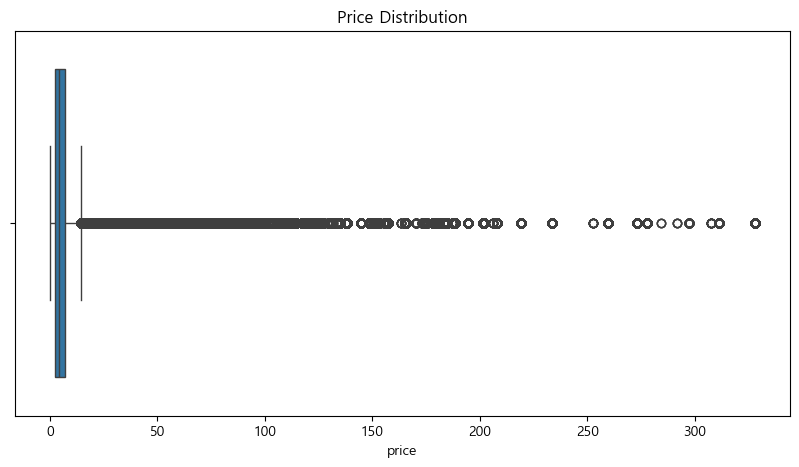

In [86]:
# 가격 분포 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title('Price Distribution')
plt.show()

In [87]:
#제품 수 확인 (중복 제거)

# 전체 고유 product_id 개수
print("고유 product_id 수:", df['product_id'].nunique())

# 상위 몇 개 출력
print("상위 product_id 예시:\n", df['product_id'].value_counts().head())

고유 product_id 수: 31083
상위 product_id 예시:
 product_id
5809910    141420
5809912     55502
5700037     50999
5854897     44735
5751422     43153
Name: count, dtype: int64


## 총 31083종류의 제품이 있고,

## 그 중 일부는 압도적으로 많은 이벤트 기록을 가짐 (예: 5809910번 제품이 14만 건).

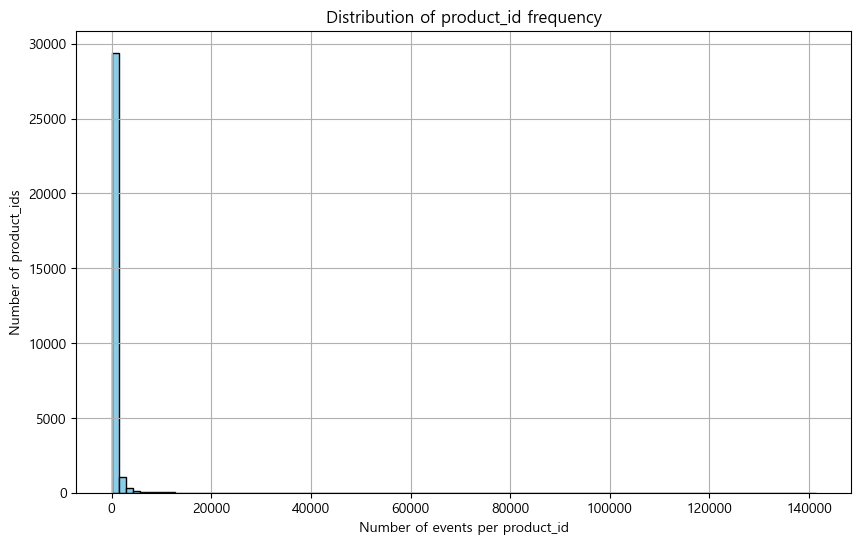

In [89]:
# 히스토그램으로 제품별 등장 횟수 분포 확인

import matplotlib.pyplot as plt

# product_id별 등장 횟수 계산
product_counts = df['product_id'].value_counts()

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(product_counts, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of product_id frequency')
plt.xlabel('Number of events per product_id')
plt.ylabel('Number of product_ids')
plt.grid(True)
plt.show()

## ✅ 그래프 해석
## X축: 각 product_id가 발생한 이벤트 수 (조회, 장바구니, 구매 등 전체 포함)
# #Y축: 해당 이벤트 수를 기록한 제품(product_id)의 개수

## 주요 해석 포인트
## 대부분의 제품은 이벤트 수가 적다
## → **X축의 왼쪽(1~수십 건 이하)**에 대부분의 product_id가 밀집되어 있음.
## → 즉, 많은 제품들이 한두 번만 조회되거나 사용됨.

## 소수의 제품만이 매우 많은 이벤트 수를 기록
## → 오른쪽 꼬리(long tail) 부분에 일부 제품이 만 건 이상 이벤트를 가짐.
## → 이는 소수의 인기 제품이 전체 트래픽을 주도하고 있다는 뜻.

## 전체 분포가 매우 불균형적임 (Power-law/Zipf 분포 형태)
## → 이런 경우 상위 제품을 별도로 분석하거나,
## → 이벤트 수가 너무 적은 제품은 분석에서 제외하는 것이 좋음.

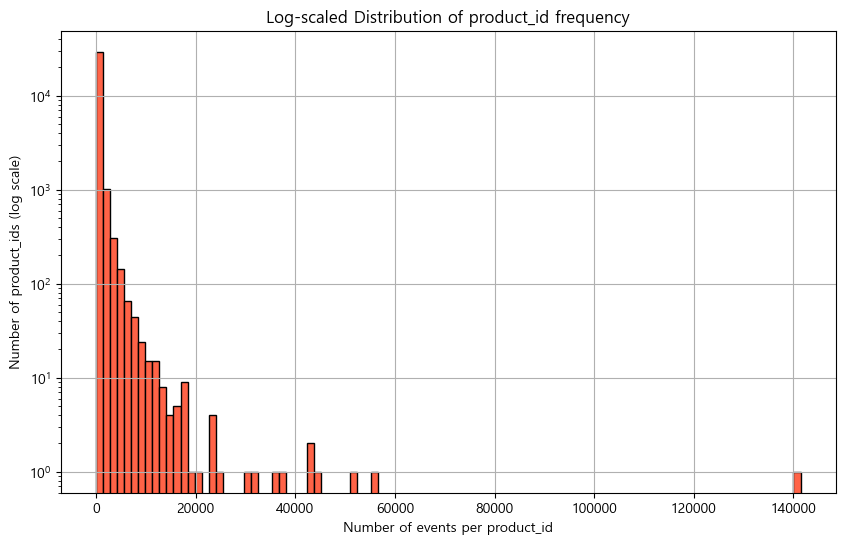

In [91]:
# 로그 스케일 분포로 보기 (상위 쏠림 확인)

plt.figure(figsize=(10, 6))
plt.hist(product_counts, bins=100, color='tomato', edgecolor='black', log=True)
plt.title('Log-scaled Distribution of product_id frequency')
plt.xlabel('Number of events per product_id')
plt.ylabel('Number of product_ids (log scale)')
plt.grid(True)
plt.show()

In [92]:
product_counts.head(10)

product_id
5809910    141420
5809912     55502
5700037     50999
5854897     44735
5751422     43153
5751383     43048
5849033     37535
5809911     36105
5816170     32159
5877454     30289
Name: count, dtype: int64

## [Product ID] 중심 EDA 계획 및 코드

### 1. 제품별 조회 수, 장바구니, 구매 수

In [95]:
# 제품별 이벤트 횟수 집계
product_event_counts = df.pivot_table(
    index='product_id', 
    columns='event_type', 
    values='user_key', 
    aggfunc='count', 
    fill_value=0
)

# 이벤트 합 및 전환율 계산
product_event_counts['total_events'] = product_event_counts.sum(axis=1)
product_event_counts['conversion_rate'] = np.where(
    product_event_counts['view'] == 0,
    np.nan,
    product_event_counts['purchase'] / product_event_counts['view']
)

# 전환율 기준 정렬
product_event_counts_sorted = product_event_counts.sort_values(by='conversion_rate', ascending=False)

In [96]:
# 제품별 이벤트 수 및 전환율 출력

# 전환율 기준 정렬된 테이블 확인
print(product_event_counts_sorted.head())  # 또는
product_event_counts_sorted.head(10)  # → Jupyter/Colab에서는 이 방식 추천

event_type  cart  purchase  remove_from_cart  view  total_events  \
product_id                                                         
5910729        6         5                 0     1            12   
5899513       18         8                 5     2            33   
5930358        4         3                 2     1            10   
5920512       11         3                12     1            27   
5894911      339       105               185    37           666   

event_type  conversion_rate  
product_id                   
5910729            5.000000  
5899513            4.000000  
5930358            3.000000  
5920512            3.000000  
5894911            2.837838  


event_type,cart,purchase,remove_from_cart,view,total_events,conversion_rate
product_id,,,,,,
5910729,6,5,0,1,12,5.000000
5899513,18,8,5,2,33,4.000000
5930358,4,3,2,1,10,3.000000
5920512,11,3,12,1,27,3.000000
5894911,339,105,185,37,666,2.837838
5894916,316,84,175,31,606,2.709677
5887054,246,64,231,25,566,2.560000
5828006,16,7,4,3,30,2.333333
5700041,812,116,239,50,1217,2.320000


## 제품별 조회수/장바구니/구매수 및 전환율 계산 (product_event_counts_sorted)

## 코드 설명 요약
## user_key 기준으로 product_id별 이벤트 수를 집계 (조회, 장바구니, 구매 등).
## 전환율(conversion_rate)은 purchase / view로 정의.
## 단, view=0인 경우 division by zero를 방지하기 위해 np.where를 활용해 처리.

## 결과 해석
## product_id=5910729는 view 1회에 purchase가 5회 → 전환율 5.0
## product_id=5899513는 view 2회에 purchase가 8회 → 전환율 4.0
## 높은 전환율을 가진 제품들은 대체로 조회수는 낮지만 구매수가 많음.
## → 이는 실제 구매까지 이르는 경로가 단축된 재구매 상품이거나, 뷰 없이 바로 장바구니→구매로 진행된 케이스일 수 있음.
## 반대로, 뷰 수는 많지만 구매율이 낮은 상품도 존재할 수 있음 (전환율 낮은 상품들).

## 비즈니스 인사이트
## 전환율 상위 제품을 분석해 상품 상세페이지 개선이나 추천 우선순위 조정에 반영할 수 있음.
## 뷰 수가 적은데 구매가 많다는 건 충성 고객 기반 상품일 가능성 → 리텐션 전략 활용 가능.

In [98]:
# 전환율과 평균 가격 비교용 테이블 출력

# 1. 전환율 계산
views = df[df['event_type'] == 'view'].groupby('product_id')['user_session'].nunique()
purchases = df[df['event_type'] == 'purchase'].groupby('product_id')['user_session'].nunique()
conversion_rate = (purchases / views).dropna()

# 2. 평균 가격 계산
avg_price = df.groupby('product_id')['price'].mean()

# 3. 전환율과 평균 가격 병합
conversion_vs_price = pd.DataFrame({
    'conversion': conversion_rate,
    'avg_price': avg_price
}).dropna()

# 4. 출력 확인
print(conversion_vs_price.head(10))


            conversion  avg_price
product_id                       
3762          0.126670  19.300827
3763          0.052117  15.994930
3774          0.109325  15.969686
3776          0.028689  15.844185
3806          0.026895  15.934284
3928          0.094982  15.990294
3929          0.023529  16.030000
3936          0.034261  13.153857
3945          0.089317  15.845684
3959          0.121065  15.957441


## 전환율과 평균 가격 비교 테이블 (conversion_vs_price)

## 코드 설명 요약
## product_id별로 평균 가격(avg_price) 계산.
## 구매 전환율(conversion)과 함께 테이블로 구성.

## 결과 해석
## 예: product_id=3762의 평균 가격은 19.30, 전환율은 0.1266
## 전반적으로 전환율이 높다고 해서 가격이 높은 것은 아님.
## 평균 가격이 낮은 제품도 높은 전환율을 가질 수 있음 → 가격과 전환율 간 비선형 관계 가능성.

## 비즈니스 인사이트
## 특정 가격대(예: 15~20)의 제품군이 전환율이 높다면, 그 구간에 집중된 제품군의 가격 전략을 유지/보강하는 것도 고려 가능.
## 전환율이 높은데 가격도 높은 제품은 프리미엄 포지셔닝 성공 사례로 볼 수 있음.

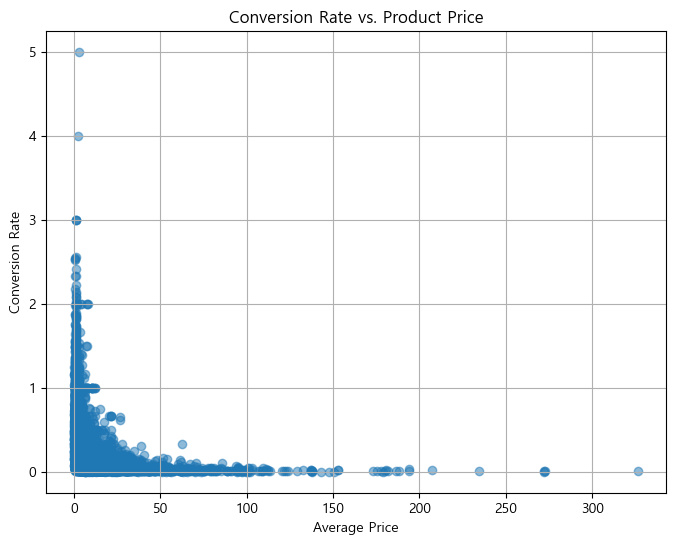

In [100]:
# 시각화
import matplotlib.pyplot as plt

# 전환율 vs. 평균 가격 산점도
plt.figure(figsize=(8,6))
plt.scatter(conversion_vs_price['avg_price'], conversion_vs_price['conversion'], alpha=0.5)
plt.xlabel('Average Price')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Product Price')
plt.grid(True)
plt.show()

## 코드 설명 요약
## matplotlib를 활용해 avg_price(x축)와 conversion(y축) 사이의 산점도 시각화.

## 결과 해석
## 전형적인 우하향 관계 (inverse relationship)
## → 가격이 낮을수록 전환율이 높은 경향
## 가격이 0~30 구간에서 대부분의 high conversion rate 관측
## 고가 상품은 대부분 전환율이 낮음

## 비즈니스 인사이트
## **H1 가설(“제품 가격이 높을수록 전환율이 낮다”)**에 대한 시각적 증거 확보
## 고가 제품군에 대해서는 전환율 개선을 위해:
## 상세페이지 개선
## 신뢰 확보 요소(리뷰, 인증 등) 추가
## 프로모션, 할인 전략 등을 고려할 수 있음

### 2. 전환율 높은 제품 Top 10

In [102]:
# product_id별 구매 전환율
views = df[df['event_type'] == 'view'].groupby('product_id')['user_session'].nunique()
purchases = df[df['event_type'] == 'purchase'].groupby('product_id')['user_session'].nunique()
product_conversion = (purchases / views).dropna().sort_values(ascending=False)

# price와 전환율의 관계 (예시)
price_mean = df.groupby('product_id')['price'].mean()
conversion_vs_price = pd.DataFrame({'conversion': product_conversion, 'avg_price': price_mean})

In [104]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'  # 맥용
# plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스용 (설치 필요 시 `apt install fonts-nanum`)

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

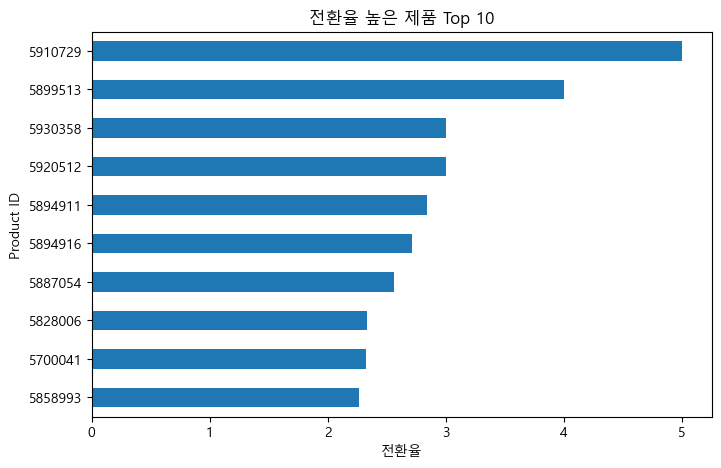

In [105]:
top10 = product_event_counts_sorted.head(10)
top10['conversion_rate'].plot(kind='barh', figsize=(8,5), title='전환율 높은 제품 Top 10')
plt.xlabel('전환율')
plt.ylabel('Product ID')
plt.gca().invert_yaxis()
plt.show()

### 3. 가격과 전환율의 관계

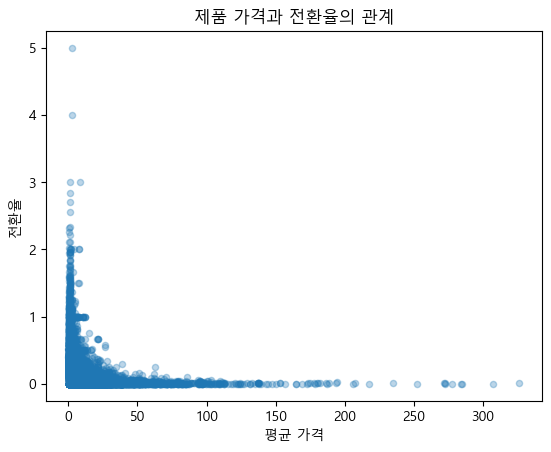

In [107]:
# 제품별 평균 가격
price_by_product = df.groupby('product_id')['price'].mean()

# price + conversion 합치기
conversion_price = pd.concat([product_event_counts['conversion_rate'], price_by_product], axis=1)
conversion_price.columns = ['conversion_rate', 'avg_price']

# 시각화
conversion_price.plot(kind='scatter', x='avg_price', y='conversion_rate', alpha=0.3,
                      title='제품 가격과 전환율의 관계')
plt.xlabel('평균 가격')
plt.ylabel('전환율')
plt.show()

### 4. 제품별 브랜드 분포

In [109]:
# 제품별 가장 많이 연결된 브랜드 확인
product_brand = df.groupby('product_id')['brand'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# 상위 제품과 브랜드 함께 보기
top10_brands = product_brand.loc[top10.index]
pd.DataFrame({'brand': top10_brands, 'conversion_rate': top10['conversion_rate']})

,brand,conversion_rate
product_id,,
5910729,dewal,5.000000
5899513,opi,4.000000
5930358,solomeya,3.000000
5920512,bielenda,3.000000
5894911,jessnail,2.837838
5894916,jessnail,2.709677
5887054,jessnail,2.560000
5828006,solomeya,2.333333
5700041,runail,2.320000


## 5. 고객 유입/구매 집중도 (유니크 user_id 및 session 수)

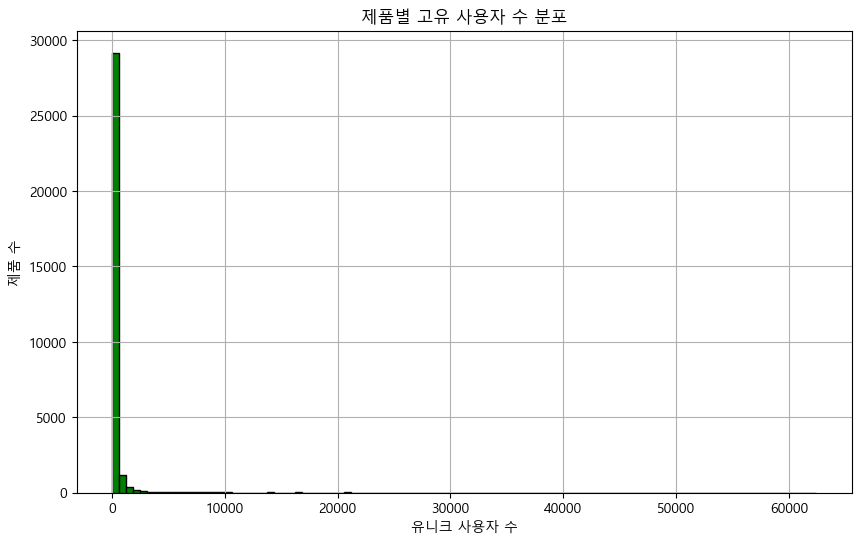

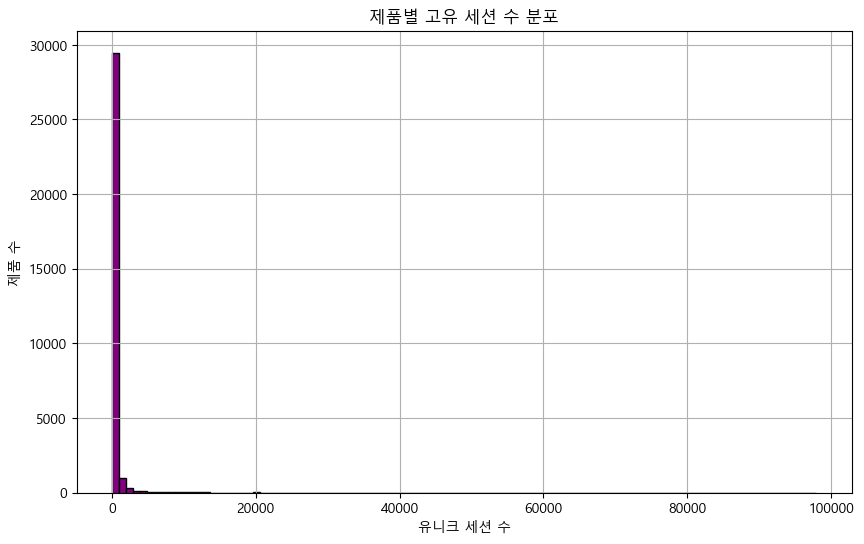

In [111]:
# 고객 유입/구매 집중도 (유니크 user_id 및 session 수)

# 제품별 고유 사용자 수
unique_users_per_product = df.groupby('product_id')['user_id'].nunique()
unique_sessions_per_product = df.groupby('product_id')['user_session'].nunique()

# 시각화: 사용자 수 분포
plt.figure(figsize=(10,6))
plt.hist(unique_users_per_product, bins=100, color='green', edgecolor='black')
plt.title('제품별 고유 사용자 수 분포')
plt.xlabel('유니크 사용자 수')
plt.ylabel('제품 수')
plt.grid(True)
plt.show()

# 시각화: 세션 수 분포
plt.figure(figsize=(10,6))
plt.hist(unique_sessions_per_product, bins=100, color='purple', edgecolor='black')
plt.title('제품별 고유 세션 수 분포')
plt.xlabel('유니크 세션 수')
plt.ylabel('제품 수')
plt.grid(True)
plt.show()

## 제품별 유입/구매 집중도 분석

## 히스토그램 1: 제품별 고유 사용자 수 분포
## X축: product_id별 유니크 user_id 수 (몇 명이 그 제품에 관심을 가졌는가?)
## Y축: 해당 유니크 유저 수를 가진 product_id의 개수

## 해석: 대부분의 제품은 1~10명 이하의 사용자만 관심을 가졌으며, 일부 인기 제품만 많은 유저가 봤다는 롱테일(long-tail) 구조를 보임.

## 히스토그램 2: 제품별 고유 세션 수 분포
## X축: product_id별 유니크 session 수 (몇 개의 세션에서 해당 상품이 등장했는가)

## 해석: 고유 사용자 수 분포와 유사하며, 소수 제품만 높은 세션 노출 → 집중된 구매/유입 패턴 존재 가능성

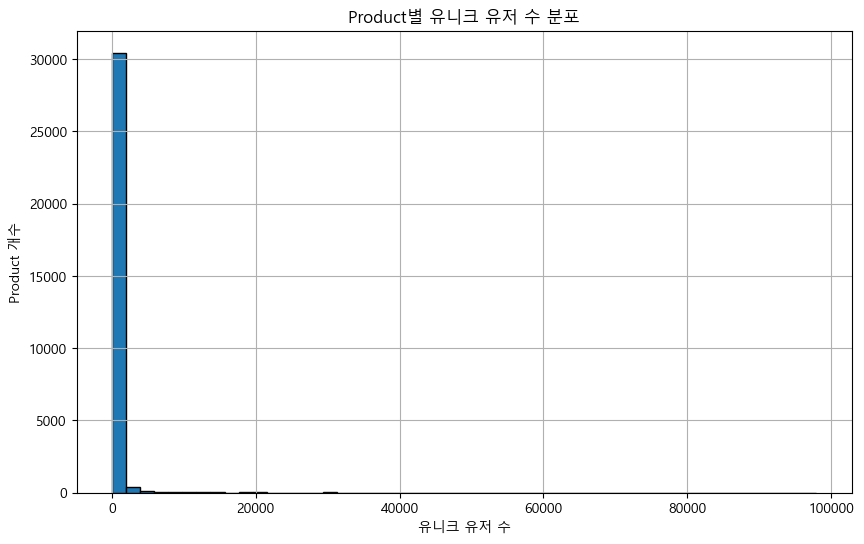

In [113]:
import matplotlib.pyplot as plt

# 유저 수 계산
user_counts = df.groupby('product_id')['user_key'].nunique()

# 시각화
plt.figure(figsize=(10,6))
plt.hist(user_counts, bins=50, edgecolor='black')
plt.title('Product별 유니크 유저 수 분포')
plt.xlabel('유니크 유저 수')
plt.ylabel('Product 개수')
plt.grid(True)
plt.show()

### 대다수의 제품은 매우 적은 수의 유저에게만 노출되었습니다.

### 유저 수가 10명 이하인 제품이 압도적으로 많습니다.

### 막대가 왼쪽(0~10) 구간에 몰려 있습니다 → Long-Tail 구조입니다.

### 일부 제품은 굉장히 많은 유저에게 노출되었습니다.

### 오른쪽 끝 (수만 명 유저에게 노출된 product_id도 존재)

### 하지만 이들은 소수에 불과함 → 전체 제품 중 일부 인기 제품에 유저 트래픽이 집중되어 있음

### 시사점
### 트래픽 집중도가 매우 높음:

### 마케팅/추천 알고리즘이 상위 인기 제품에 유입을 몰아주고 있을 가능성

### Tail 영역의 제품(유저 수 적은 제품)은 상대적으로 소외되거나 노출 기회가 부족

### Tail 제품을 어떻게 활성화할 것인지 전략 필요:

### 개인화 추천, Long-tail 전용 큐레이션 전략

### 카테고리별로 나눠 보면 트렌드가 달라질 수도 있음

## 6. 상위 제품 집중 분석 (전환율 Top 10 히트맵)

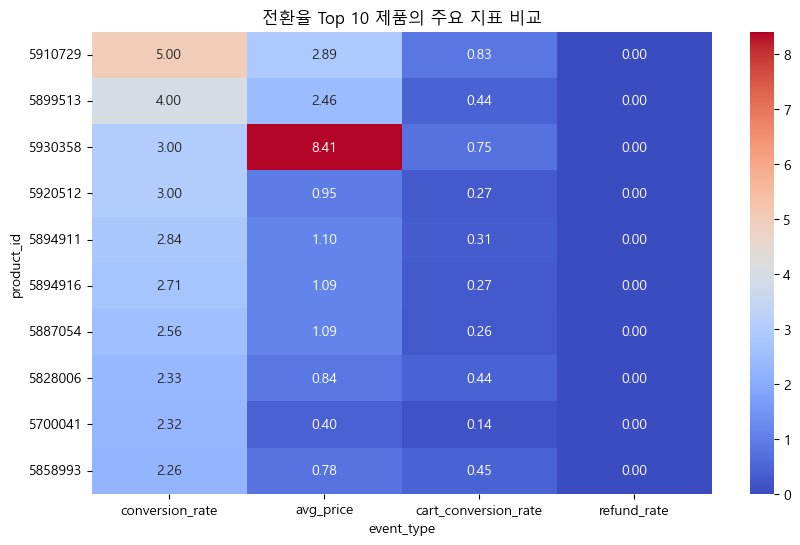

In [116]:
# 상위 제품 집중 분석 (전환율 Top 10 히트맵)

import seaborn as sns

# 구매 전환율 높은 상위 10개 제품
top10 = product_event_counts_sorted.head(10).copy()

# 전환율 외 파생 변수들 계산
top10['avg_price'] = df.groupby('product_id')['price'].mean().reindex(top10.index)
top10['cart_conversion_rate'] = top10['purchase'] / (top10['cart'] + 1e-5)
top10['refund_rate'] = df[df['price'] < 0].groupby('product_id')['user_id'].count().reindex(top10.index).fillna(0)
top10['refund_rate'] = top10['refund_rate'] / top10['purchase']

# 주요 변수 시각화 (히트맵)
plt.figure(figsize=(10, 6))
sns.heatmap(top10[['conversion_rate', 'avg_price', 'cart_conversion_rate', 'refund_rate']],
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title('전환율 Top 10 제품의 주요 지표 비교')
plt.show()

## 전환율 높은 제품의 주요 지표 비교

## 구성 항목:
## 전환율 (conversion_rate): view 대비 purchase 비율
## 평균 가격 (avg_price): 해당 product_id의 평균 가격
## 장바구니 전환율 (cart_conversion_rate): cart 대비 purchase 비율
## 환불율 (refund_rate): purchase 대비 환불 발생 비율

## 해석:
## 상위 10개 제품은 모두 전환율 2.5~5.0 수준
## 평균 가격은 제품마다 다름 (예: product_id 5930358은 8.41로 가장 높음)
## 대부분의 제품은 환불 비율이 0에 가까움, 이는 긍정적인 신호
## 구매까지 연결된 장바구니 비율이 높은 제품은 의사결정 확신도가 높았을 가능성

## 7. 카테고리/브랜드별 전환율 (product_id 기반 groupby)

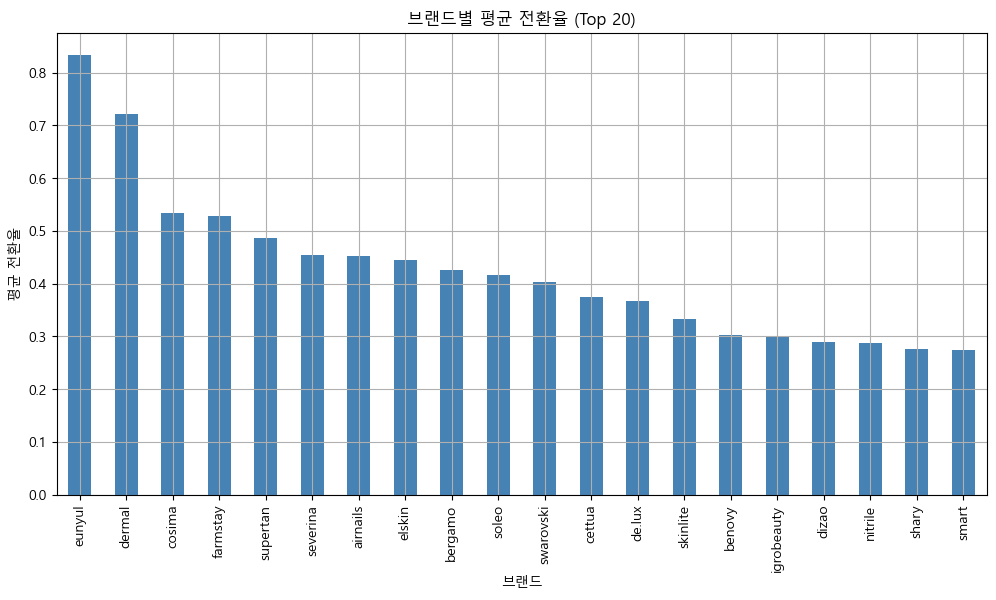

In [119]:
# 카테고리/브랜드별 전환율 (product_id 기반 groupby)

# 브랜드별 전환율 계산
df_merged = df.merge(product_event_counts[['conversion_rate']], how='left', left_on='product_id', right_index=True)

# 브랜드 전환율 평균
brand_conversion = df_merged.groupby('brand')['conversion_rate'].mean().dropna().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
brand_conversion.head(20).plot(kind='bar', color='steelblue')
plt.title('브랜드별 평균 전환율 (Top 20)')
plt.xlabel('브랜드')
plt.ylabel('평균 전환율')
plt.grid(True)
plt.show()

## 브랜드별 평균 전환율 (Top 20)

## 구성:
## product_id → brand로 연결
## conversion_rate를 브랜드 단위로 평균 집계

## 해석:
## ‘enryul’, ‘dermal’, ‘cosima’ 등은 평균 전환율이 매우 높음 (0.7~0.85 수준)
## 브랜드별로 고객 충성도 혹은 마케팅 효율성 차이 존재
## 제품의 전환율이 단순히 가격이 아니라 브랜드 신뢰도/인지도/품질에 따라 크게 달라짐을 시사

## 8. product_id별 평균 구매까지 소요시간 분석

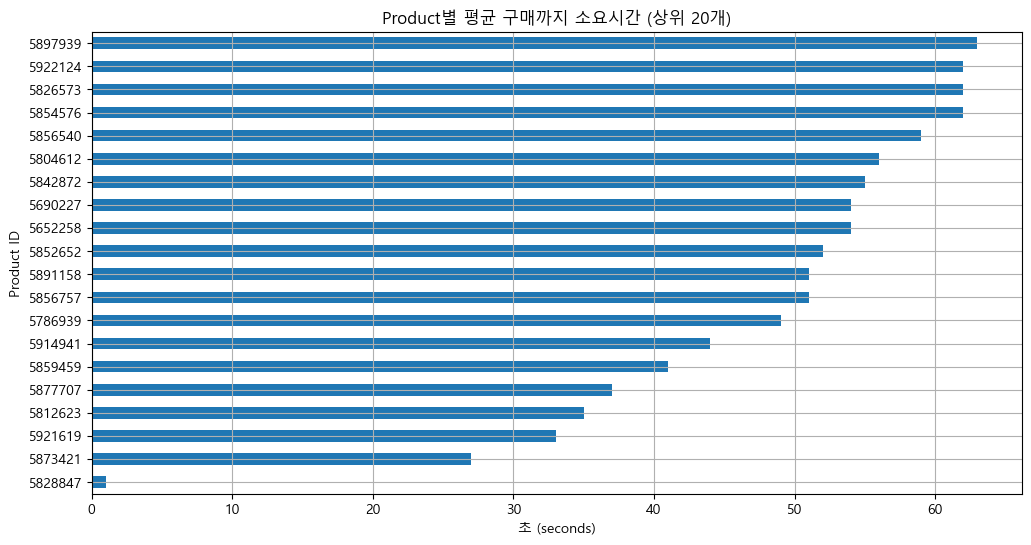

In [122]:
df['event_time'] = pd.to_datetime(df['event_time'])

# view & purchase만 사용
view_df = df[df['event_type'] == 'view']
purchase_df = df[df['event_type'] == 'purchase']

# merge: 같은 user_key & product_id 기준으로 purchase에 가장 가까운 view 찾기
merged = pd.merge(
    purchase_df,
    view_df,
    on=['user_key', 'product_id'],
    suffixes=('_purchase', '_view')
)

# view가 purchase보다 앞선 것만 필터
merged = merged[merged['event_time_view'] < merged['event_time_purchase']]

# 시간 차이 계산
merged['time_to_purchase'] = (merged['event_time_purchase'] - merged['event_time_view']).dt.total_seconds()

# 평균 소요 시간 (product_id 기준)
avg_time = merged.groupby('product_id')['time_to_purchase'].mean()

# 상위 제품 시각화
avg_time_sorted = avg_time.sort_values().head(20)

plt.figure(figsize=(12,6))
avg_time_sorted.plot(kind='barh')
plt.title('Product별 평균 구매까지 소요시간 (상위 20개)')
plt.xlabel('초 (seconds)')
plt.ylabel('Product ID')
plt.grid(True)
plt.show()

## 9. View → Cart → Purchase 전환률 분석 (funnel conversion)

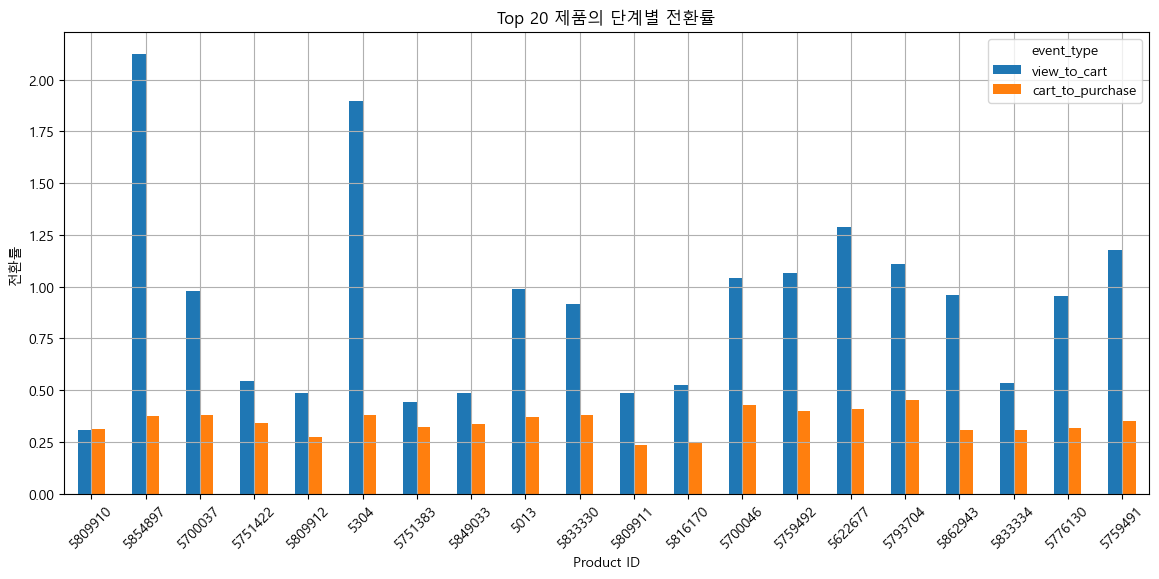

In [124]:
# 이벤트별 유저 수 집계
funnel_df = df.pivot_table(
    index='product_id',
    columns='event_type',
    values='user_key',
    aggfunc='nunique',
    fill_value=0
)

# 단계별 전환률 계산
funnel_df['view_to_cart'] = funnel_df['cart'] / funnel_df['view']
funnel_df['cart_to_purchase'] = funnel_df['purchase'] / funnel_df['cart']
funnel_df = funnel_df.replace([np.inf, np.nan], 0)

# 상위 제품 시각화
top_funnel = funnel_df.sort_values(by='purchase', ascending=False).head(20)

top_funnel[['view_to_cart', 'cart_to_purchase']].plot(kind='bar', figsize=(14,6))
plt.title('Top 20 제품의 단계별 전환률')
plt.ylabel('전환률')
plt.xlabel('Product ID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 10. 장바구니 → 구매 이탈률 상위 제품

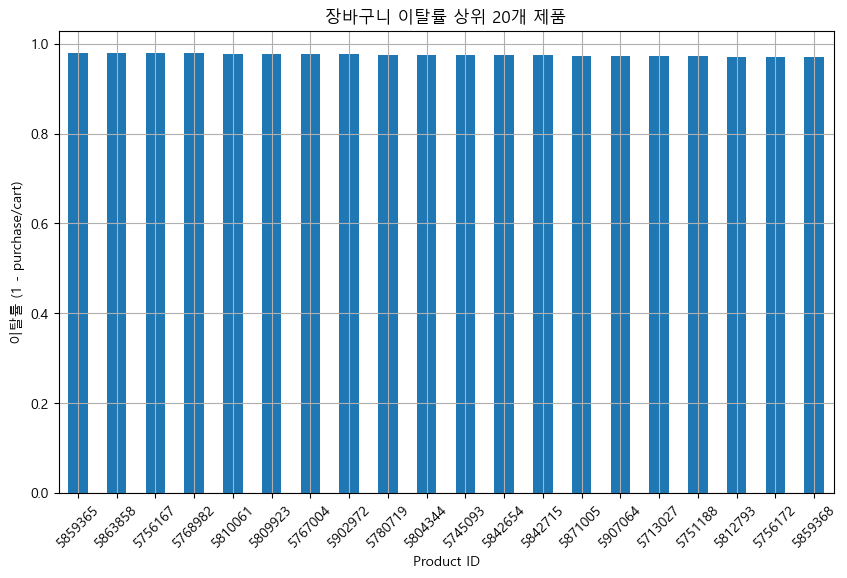

In [126]:
# cart와 purchase 수 비교
cart_counts = df[df['event_type'] == 'cart'].groupby('product_id')['user_key'].nunique()
purchase_counts = df[df['event_type'] == 'purchase'].groupby('product_id')['user_key'].nunique()

# 이탈률 = (cart - purchase) / cart
funnel_dropoff = ((cart_counts - purchase_counts) / cart_counts).dropna()
funnel_dropoff = funnel_dropoff[funnel_dropoff >= 0]  # 음수 제거 (이상치)
top_dropoff = funnel_dropoff.sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(10,6))
top_dropoff.plot(kind='bar')
plt.title('장바구니 이탈률 상위 20개 제품')
plt.ylabel('이탈률 (1 - purchase/cart)')
plt.xlabel('Product ID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
## 11. 월별 product_id 통계

In [161]:
# 월별(product_id 개수) 통계

# 월별 고유 product_id 수 세기
monthly_product_counts = df.groupby('event_month')['product_id'].nunique()
print(monthly_product_counts)

event_month
1.0     25752
2.0     27254
10.0    23973
11.0    24300
12.0    25675
Name: product_id, dtype: int64


In [162]:
# 월별 product_id별 등장 횟수
monthly_product_usage = df.groupby(['event_month', 'product_id']).size().reset_index(name='count')
print(monthly_product_usage.head())

   event_month  product_id  count
0          1.0        3752     23
1          1.0        3762   1162
2          1.0        3763     15
3          1.0        3773      1
4          1.0        3774     74


In [165]:
# 월별 가장 많이 등장한 product_id 상위 5개
top5_monthly = (
    df.groupby(['event_month', 'product_id'])
    .size()
    .reset_index(name='count')
    .sort_values(['event_month', 'count'], ascending=[True, False])
    .groupby('event_month')
    .head(5)
)

In [167]:
# 월별 고유 product_id 목록 추출
monthly_product_list = df.groupby('event_month')['product_id'].unique()
print(monthly_product_list)

event_month
1.0     [5867151, 5700046, 5915012, 5705002, 5867107, ...
2.0     [5770044, 5879282, 5834491, 5817774, 5770045, ...
10.0    [5773203, 5773353, 5881589, 5723490, 5881449, ...
11.0    [5862295, 5873072, 5882396, 5751383, 5826988, ...
12.0    [5764543, 5846402, 5849033, 16198, 5816171, 58...
Name: product_id, dtype: object


## 12. 전환률 낮은 제품 = 장바구니 이탈률 높은 제품 (테이블 + 이탈률)

In [171]:
# cart와 purchase 수 집계
cart_counts = df[df['event_type'] == 'cart'].groupby('product_id')['user_key'].nunique()
purchase_counts = df[df['event_type'] == 'purchase'].groupby('product_id')['user_key'].nunique()

# 이탈률 계산
funnel_dropoff = ((cart_counts - purchase_counts) / cart_counts).dropna()
funnel_dropoff = funnel_dropoff[funnel_dropoff >= 0]

# 이탈률 높은 제품 20개
low_conversion_products = funnel_dropoff.sort_values(ascending=False).head(20)

# 브랜드/가격 정보 추가
dropoff_info = df[df['product_id'].isin(low_conversion_products.index)]
dropoff_summary = dropoff_info.groupby('product_id').agg({
    'brand': 'first',
    'price': 'mean'
}).rename(columns={'price': 'avg_price'})
dropoff_summary['dropoff_rate'] = low_conversion_products
dropoff_summary.sort_values(by='dropoff_rate', ascending=False)

,brand,avg_price,dropoff_rate
product_id,,,
5859365,uno,9.324881,0.980000
5863858,missha,22.220106,0.979592
5756167,uno,8.124265,0.979167
5768982,irisk,142.970121,0.978723
5810061,irisk,3.643151,0.978261
5809923,irisk,10.216809,0.978261
5767004,kosmekka,102.079739,0.976744
5902972,cnd,11.300000,0.976190
5780719,pole,5.483424,0.975610


## 13. 브랜드별 전환율 분포 (Boxplot)

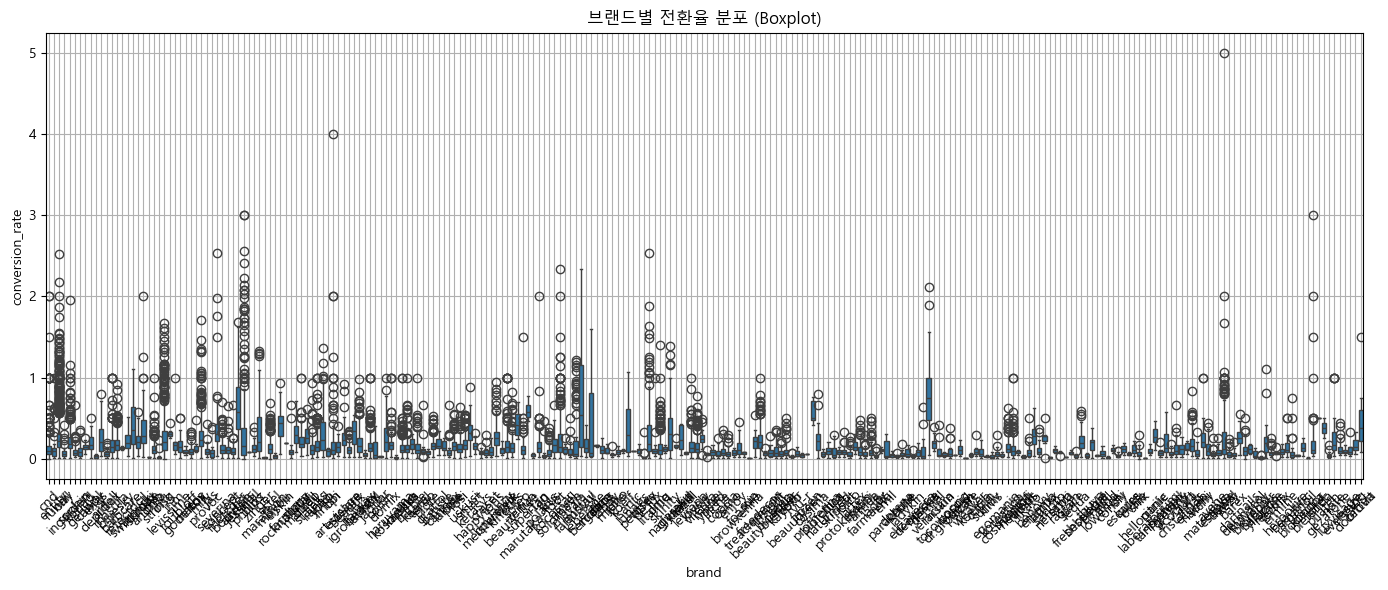

In [174]:
# 전환율 계산
views = df[df['event_type'] == 'view'].groupby('product_id')['user_session'].nunique()
purchases = df[df['event_type'] == 'purchase'].groupby('product_id')['user_session'].nunique()
conversion_rate = (purchases / views).dropna()

# product_id → brand 매핑
product_brand = df.groupby('product_id')['brand'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# 결합
conversion_by_brand = pd.DataFrame({
    'conversion_rate': conversion_rate,
    'brand': product_brand
}).dropna()

# boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=conversion_by_brand, x='brand', y='conversion_rate')
plt.xticks(rotation=45)
plt.title('브랜드별 전환율 분포 (Boxplot)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 14. 가격대별 전환율 분포 (Scatter Plot)

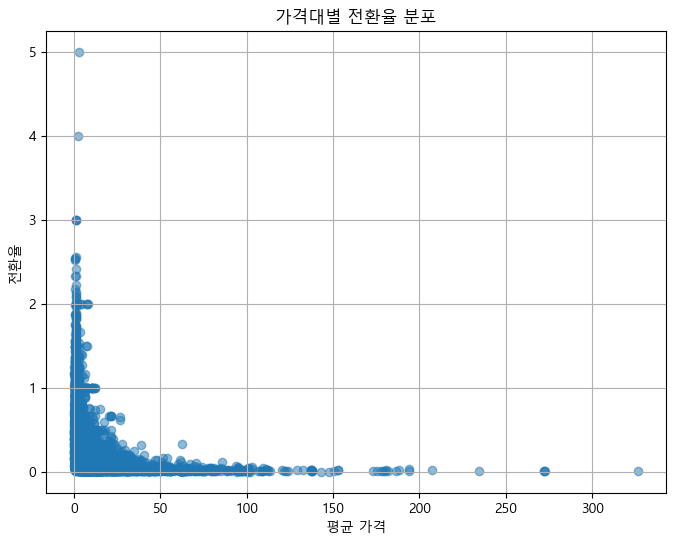

In [177]:
# 가격 정보와 결합
avg_price = df.groupby('product_id')['price'].mean()

conversion_vs_price = pd.DataFrame({
    'conversion_rate': conversion_rate,
    'avg_price': avg_price
}).dropna()

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(conversion_vs_price['avg_price'], conversion_vs_price['conversion_rate'], alpha=0.5)
plt.xlabel('평균 가격')
plt.ylabel('전환율')
plt.title('가격대별 전환율 분포')
plt.grid(True)
plt.show()